In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.collections import LineCollection
import seaborn as sns
import fastf1 as f1
from fastf1 import plotting
from ing_theme_matplotlib import mpl_style
import mplcyberpunk

In [5]:
def convert_to_normal(time):
    if pd.isna(time):
        return time

    time_str = str(time)
    parts = time_str.split()

    days = int(parts[0])
    minutes, seconds_with_microseconds = parts[2].split(":")[1:]
    seconds, microseconds = seconds_with_microseconds.split(".")

    minutes = int(minutes)
    seconds = int(seconds)
    microseconds = int(microseconds)

    total_microseconds = (
        days * 86400000000 + minutes * 60000000 + seconds * 1000000 + microseconds
    )

    minutes, remaining_microseconds = divmod(total_microseconds, 60000000)
    seconds, microseconds = divmod(remaining_microseconds, 1000000)

    normal_time = f"{minutes:02d}:{seconds:02d}.{microseconds:06d}"
    return normal_time

*Qualifying*

In [6]:
quali = f1.get_session(2025, "Japan", "Qualifying")
quali.load()

req         WARNING 	DEFAULT CACHE ENABLED! (802.23 MB) /home/sohamdesai/.cache/fastf1


core           INFO 	Loading data for Japanese Grand Prix - Qualifying [v3.4.4]
req            INFO 	Using cached data for session_info
req            INFO 	Using cached data for driver_info
core        WARNING 	No result data for this session available on Ergast! (This is expected for recent sessions)
req            INFO 	Using cached data for session_status_data
req            INFO 	Using cached data for track_status_data
req            INFO 	Using cached data for _extended_timing_data
req            INFO 	Using cached data for timing_app_data
core           INFO 	Processing timing data...
req            INFO 	Using cached data for car_data
req            INFO 	Using cached data for position_data
req            INFO 	Using cached data for weather_data
req            INFO 	Using cached data for race_control_messages
core           INFO 	Finished loading data for 20 drivers: ['1', '4', '81', '16', '63', '12', '6', '44', '23', '87', '10', '55', '14', '30', '22', '27', '5', '31', '7', '1

In [7]:
quali.session_info

{'Meeting': {'Key': 1256,
  'Name': 'Japanese Grand Prix',
  'OfficialName': 'FORMULA 1 LENOVO JAPANESE GRAND PRIX 2025 ',
  'Location': 'Suzuka',
  'Number': 3,
  'Country': {'Key': 4, 'Code': 'JPN', 'Name': 'Japan'},
  'Circuit': {'Key': 46, 'ShortName': 'Suzuka'}},
 'ArchiveStatus': {'Status': 'Generating'},
 'Key': 10002,
 'Type': 'Qualifying',
 'Name': 'Qualifying',
 'StartDate': datetime.datetime(2025, 4, 5, 15, 0),
 'EndDate': datetime.datetime(2025, 4, 5, 16, 0),
 'GmtOffset': datetime.timedelta(seconds=32400),
 'Path': '2025/2025-04-06_Japanese_Grand_Prix/2025-04-05_Qualifying/'}

In [8]:
quali.results.loc[
    :, ["Abbreviation", "TeamName", "GridPosition", "Position", "Time", "Status"]
]

,Abbreviation,TeamName,GridPosition,Position,Time,Status
1,VER,Red Bull Racing,NaN,1.0,NaT,
4,NOR,McLaren,NaN,2.0,NaT,
81,PIA,McLaren,NaN,3.0,NaT,
16,LEC,Ferrari,NaN,4.0,NaT,
63,RUS,Mercedes,NaN,5.0,NaT,
12,ANT,Mercedes,NaN,6.0,NaT,
6,HAD,Racing Bulls,NaN,7.0,NaT,
44,HAM,Ferrari,NaN,8.0,NaT,
23,ALB,Williams,NaN,9.0,NaT,
87,BEA,Haas F1 Team,NaN,10.0,NaT,


In [9]:
quali_laps = quali.laps
quali_laps

,Time,Driver,DriverNumber,LapTime,LapNumber,Stint,PitOutTime,PitInTime,Sector1Time,Sector2Time,...,FreshTyre,Team,LapStartTime,LapStartDate,TrackStatus,Position,Deleted,DeletedReason,FastF1Generated,IsAccurate
0,0 days 00:16:49.817000,NOR,4,NaT,1.0,1.0,0 days 00:15:07.002000,NaT,NaT,0 days 00:00:45.150000,...,True,McLaren,0 days 00:15:07.002000,2025-04-05 06:01:28.882,1,NaN,False,,False,False
1,0 days 00:18:18.050000,NOR,4,0 days 00:01:28.233000,2.0,1.0,NaT,NaT,0 days 00:00:30.784000,0 days 00:00:39.969000,...,True,McLaren,0 days 00:16:49.817000,2025-04-05 06:03:11.697,1,NaN,False,,False,True
2,0 days 00:20:17.549000,NOR,4,0 days 00:01:59.499000,3.0,1.0,NaT,NaT,0 days 00:00:47.672000,0 days 00:00:49.334000,...,True,McLaren,0 days 00:18:18.050000,2025-04-05 06:04:39.930,1,NaN,False,,False,True
3,0 days 00:22:24.537000,NOR,4,0 days 00:02:06.988000,4.0,1.0,NaT,NaT,0 days 00:00:54.076000,0 days 00:00:48.782000,...,True,McLaren,0 days 00:20:17.549000,2025-04-05 06:06:39.429,1,NaN,False,,False,True
4,0 days 00:23:52.382000,NOR,4,0 days 00:01:27.845000,5.0,1.0,NaT,NaT,0 days 00:00:30.610000,0 days 00:00:39.725000,...,True,McLaren,0 days 00:22:24.537000,2025-04-05 06:08:46.417,1,NaN,False,,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
287,0 days 00:23:18.369000,HUL,27,0 days 00:01:28.857000,5.0,2.0,NaT,NaT,0 days 00:00:31.132000,0 days 00:00:40.060000,...,True,Kick Sauber,0 days 00:21:49.512000,2025-04-05 06:08:11.392,1,NaN,False,,False,True
288,0 days 00:25:06.684000,HUL,27,0 days 00:01:48.315000,6.0,2.0,NaT,0 days 00:25:04.334000,0 days 00:00:37.642000,0 days 00:00:46.058000,...,True,Kick Sauber,0 days 00:23:18.369000,2025-04-05 06:09:40.249,1,NaN,False,,False,False
289,0 days 00:30:47.155000,HUL,27,NaT,7.0,3.0,0 days 00:28:57.305000,NaT,NaT,0 days 00:00:46.711000,...,True,Kick Sauber,0 days 00:25:06.684000,2025-04-05 06:11:28.564,1,NaN,False,,False,False
290,0 days 00:32:15.725000,HUL,27,0 days 00:01:28.570000,8.0,3.0,NaT,NaT,0 days 00:00:31.082000,0 days 00:00:39.984000,...,True,Kick Sauber,0 days 00:30:47.155000,2025-04-05 06:17:09.035,1,NaN,False,,False,True


In [10]:
ver_quali_laps = quali.laps.pick_driver("VER")
fastest_lap_ver_quali = ver_quali_laps.pick_fastest().LapTime
ver_quali_lap_time = ver_quali_laps["LapTime"]
ver_quali_sec1 = ver_quali_laps["Sector1Time"]
ver_quali_sec2 = ver_quali_laps["Sector2Time"]
ver_quali_sec3 = ver_quali_laps["Sector3Time"]
print("Fastest Lap:", convert_to_normal(fastest_lap_ver_quali), "which was in Lap number" ,ver_quali_laps.pick_fastest().LapNumber)
ver_quali_laps.loc[:,["LapTime","Sector1Time","Sector2Time","Sector3Time","SpeedI1","SpeedI2","SpeedFL","SpeedST"]].head()

Fastest Lap: 01:26.983000 which was in Lap number 16.0


/home/sohamdesai/Coding/F1-data-analysis/.venv/lib/python3.12/site-packages/fastf1/core.py:3022: FutureWarning: pick_driver is deprecated and will be removed in a future release. Use pick_drivers instead.
  warnings.warn(("pick_driver is deprecated and will be removed"


,LapTime,Sector1Time,Sector2Time,Sector3Time,SpeedI1,SpeedI2,SpeedFL,SpeedST
71,NaT,NaT,0 days 00:00:51.475000,0 days 00:00:20.064000,237.0,194.0,272.0,249.0
72,0 days 00:01:28.360000,0 days 00:00:30.856000,0 days 00:00:40.015000,0 days 00:00:17.489000,288.0,298.0,270.0,297.0
73,0 days 00:02:04.304000,0 days 00:00:45.737000,0 days 00:00:52.077000,0 days 00:00:26.490000,248.0,190.0,NaN,235.0
74,NaT,NaT,0 days 00:00:51.956000,0 days 00:00:19.667000,204.0,268.0,273.0,234.0
75,0 days 00:01:27.943000,0 days 00:00:30.696000,0 days 00:00:39.718000,0 days 00:00:17.529000,288.0,299.0,270.0,297.0


In [11]:
fastest_lap_ver_quali = ver_quali_laps.pick_fastest()
tele_ver_quali = fastest_lap_ver_quali.get_telemetry().add_distance()
speed_ver_quali = tele_ver_quali.Speed
tele_ver_quali.loc[:, ["Speed", "nGear", "RPM"]]

,Speed,nGear,RPM
2,279,7,11059
3,280,7,11109
4,282,7,11210
5,285,7,11337
6,288,7,11464
...,...,...,...
651,269,7,10732
652,272,7,10828
653,275,7,10924
654,276,7,11005


In [12]:
nor_quali_laps = quali.laps.pick_driver("NOR")
fastest_lap_nor_quali = nor_quali_laps.pick_fastest().LapTime
nor_quali_lap_time = nor_quali_laps["LapTime"]
nor_quali_sec1 = nor_quali_laps["Sector1Time"]
nor_quali_sec2 = nor_quali_laps["Sector2Time"]
nor_quali_sec3 = nor_quali_laps["Sector3Time"]
print("Fastest Lap:", convert_to_normal(fastest_lap_nor_quali), "which was in Lap number" ,nor_quali_laps.pick_fastest().LapNumber)
nor_quali_laps.loc[:,["LapTime","Sector1Time","Sector2Time","Sector3Time","SpeedI1","SpeedI2","SpeedFL","SpeedST"]].head()

Fastest Lap: 01:26.995000 which was in Lap number 14.0


/home/sohamdesai/Coding/F1-data-analysis/.venv/lib/python3.12/site-packages/fastf1/core.py:3022: FutureWarning: pick_driver is deprecated and will be removed in a future release. Use pick_drivers instead.
  warnings.warn(("pick_driver is deprecated and will be removed"


,LapTime,Sector1Time,Sector2Time,Sector3Time,SpeedI1,SpeedI2,SpeedFL,SpeedST
0,NaT,NaT,0 days 00:00:45.150000,0 days 00:00:20.175000,261.0,276.0,270.0,242.0
1,0 days 00:01:28.233000,0 days 00:00:30.784000,0 days 00:00:39.969000,0 days 00:00:17.480000,285.0,299.0,270.0,297.0
2,0 days 00:01:59.499000,0 days 00:00:47.672000,0 days 00:00:49.334000,0 days 00:00:22.493000,239.0,250.0,179.0,227.0
3,0 days 00:02:06.988000,0 days 00:00:54.076000,0 days 00:00:48.782000,0 days 00:00:24.130000,191.0,275.0,271.0,236.0
4,0 days 00:01:27.845000,0 days 00:00:30.610000,0 days 00:00:39.725000,0 days 00:00:17.510000,288.0,303.0,272.0,299.0


In [13]:
fastest_lap_nor_quali = nor_quali_laps.pick_fastest()
tele_nor_quali = fastest_lap_nor_quali.get_telemetry().add_distance()
speed_nor_quali = tele_nor_quali.Speed
tele_nor_quali.loc[:, ["Speed", "nGear", "RPM"]]

,Speed,nGear,RPM
2,279,7,11150
3,280,7,11193
4,282,7,11278
5,285,7,11364
6,286,7,11405
...,...,...,...
652,268,7,10805
653,271,7,10992
654,273,7,11070
655,275,7,11149


In [14]:
lec_quali_laps = quali.laps.pick_driver("LEC")
fastest_lap_lec_quali = lec_quali_laps.pick_fastest().LapTime
lec_quali_lap_time = lec_quali_laps["LapTime"]
lec_quali_sec1 = lec_quali_laps["Sector1Time"]
lec_quali_sec2 = lec_quali_laps["Sector2Time"]
lec_quali_sec3 = lec_quali_laps["Sector3Time"]
print("Fastest Lap:", convert_to_normal(fastest_lap_lec_quali), "which was in Lap number" ,lec_quali_laps.pick_fastest().LapNumber)
lec_quali_laps.loc[:,["LapTime","Sector1Time","Sector2Time","Sector3Time","SpeedI1","SpeedI2","SpeedFL","SpeedST"]].head()

Fastest Lap: 01:27.299000 which was in Lap number 17.0


/home/sohamdesai/Coding/F1-data-analysis/.venv/lib/python3.12/site-packages/fastf1/core.py:3022: FutureWarning: pick_driver is deprecated and will be removed in a future release. Use pick_drivers instead.
  warnings.warn(("pick_driver is deprecated and will be removed"


,LapTime,Sector1Time,Sector2Time,Sector3Time,SpeedI1,SpeedI2,SpeedFL,SpeedST
50,NaT,NaT,0 days 00:00:46.104000,0 days 00:00:18.817000,257.0,276.0,271.0,272.0
51,0 days 00:01:28.571000,0 days 00:00:30.911000,0 days 00:00:40.080000,0 days 00:00:17.580000,286.0,298.0,270.0,294.0
52,0 days 00:02:07.688000,0 days 00:00:47.851000,0 days 00:00:53.734000,0 days 00:00:26.103000,248.0,254.0,NaN,221.0
53,NaT,0 days 00:01:20.681000,0 days 00:00:52.013000,0 days 00:00:21.865000,229.0,269.0,271.0,245.0
54,0 days 00:01:27.920000,0 days 00:00:30.670000,0 days 00:00:39.841000,0 days 00:00:17.409000,289.0,300.0,271.0,296.0


In [15]:
fastest_lap_lec_quali = lec_quali_laps.pick_fastest()
tele_lec_quali = fastest_lap_lec_quali.get_telemetry().add_distance()
speed_lec_quali = tele_lec_quali.Speed
tele_lec_quali.loc[:, ["Speed", "nGear", "RPM"]]

core        WARNING 	Failed to preserve data type for column 'X' while merging telemetry.
core        WARNING 	Failed to preserve data type for column 'Y' while merging telemetry.
core        WARNING 	Failed to preserve data type for column 'Z' while merging telemetry.


,Speed,nGear,RPM
2,279,7,11215
3,280,7,11294
4,282,7,11348
5,285,7,11402
6,286,7,11438
...,...,...,...
660,270,7,10882
661,273,7,10940
662,274,7,11021
663,275,7,11102


In [16]:
had_quali_laps = quali.laps.pick_driver("HAD")
fastest_lap_had_quali = had_quali_laps.pick_fastest().LapTime
had_quali_lap_time = had_quali_laps["LapTime"]
had_quali_sec1 = had_quali_laps["Sector1Time"]
had_quali_sec2 = had_quali_laps["Sector2Time"]
had_quali_sec3 = had_quali_laps["Sector3Time"]
print("Fastest Lap:", convert_to_normal(fastest_lap_had_quali), "which was in Lap number" ,had_quali_laps.pick_fastest().LapNumber)
had_quali_laps.loc[:,["LapTime","Sector1Time","Sector2Time","Sector3Time","SpeedI1","SpeedI2","SpeedFL","SpeedST"]].head()

Fastest Lap: 01:27.569000 which was in Lap number 17.0


/home/sohamdesai/Coding/F1-data-analysis/.venv/lib/python3.12/site-packages/fastf1/core.py:3022: FutureWarning: pick_driver is deprecated and will be removed in a future release. Use pick_drivers instead.
  warnings.warn(("pick_driver is deprecated and will be removed"


,LapTime,Sector1Time,Sector2Time,Sector3Time,SpeedI1,SpeedI2,SpeedFL,SpeedST
155,NaT,NaT,0 days 00:00:50.968000,0 days 00:00:25.457000,263.0,284.0,271.0,263.0
156,0 days 00:01:29.203000,0 days 00:00:31.337000,0 days 00:00:40.364000,0 days 00:00:17.502000,287.0,300.0,267.0,295.0
157,0 days 00:01:52.937000,0 days 00:00:40.752000,0 days 00:00:46.560000,0 days 00:00:25.625000,261.0,273.0,NaN,272.0
158,NaT,NaT,0 days 00:00:47.557000,0 days 00:00:25.528000,264.0,266.0,271.0,110.0
159,0 days 00:01:28.278000,0 days 00:00:30.924000,0 days 00:00:39.881000,0 days 00:00:17.473000,287.0,300.0,268.0,296.0


In [17]:
fastest_lap_had_quali = had_quali_laps.pick_fastest()
tele_had_quali = fastest_lap_had_quali.get_telemetry().add_distance()
speed_had_quali = tele_had_quali.Speed
tele_had_quali.loc[:, ["Speed", "nGear", "RPM"]]

,Speed,nGear,RPM
2,280,7,11113
3,281,7,11146
4,283,7,11212
5,285,7,11278
6,288,7,11375
...,...,...,...
665,269,7,10795
666,271,7,10887
667,273,7,10979
668,276,7,11072


In [18]:
alb_quali_laps = quali.laps.pick_driver("ALB")
fastest_lap_alb_quali = alb_quali_laps.pick_fastest().LapTime
alb_quali_lap_time = alb_quali_laps["LapTime"]
alb_quali_sec1 = alb_quali_laps["Sector1Time"]
alb_quali_sec2 = alb_quali_laps["Sector2Time"]
alb_quali_sec3 = alb_quali_laps["Sector3Time"]
print("Fastest Lap:", convert_to_normal(fastest_lap_alb_quali), "which was in Lap number" ,alb_quali_laps.pick_fastest().LapNumber)
alb_quali_laps.loc[:,["LapTime","Sector1Time","Sector2Time","Sector3Time","SpeedI1","SpeedI2","SpeedFL","SpeedST"]].head()

Fastest Lap: 01:27.615000 which was in Lap number 19.0


/home/sohamdesai/Coding/F1-data-analysis/.venv/lib/python3.12/site-packages/fastf1/core.py:3022: FutureWarning: pick_driver is deprecated and will be removed in a future release. Use pick_drivers instead.
  warnings.warn(("pick_driver is deprecated and will be removed"


,LapTime,Sector1Time,Sector2Time,Sector3Time,SpeedI1,SpeedI2,SpeedFL,SpeedST
111,NaT,NaT,0 days 00:00:49.818000,0 days 00:00:19.814000,278.0,246.0,272.0,252.0
112,0 days 00:01:28.744000,0 days 00:00:30.974000,0 days 00:00:40.202000,0 days 00:00:17.568000,287.0,302.0,270.0,297.0
113,0 days 00:01:49.214000,0 days 00:00:39.663000,0 days 00:00:44.948000,0 days 00:00:24.603000,243.0,282.0,NaN,241.0
114,NaT,NaT,0 days 00:00:47.420000,0 days 00:00:20.525000,280.0,280.0,274.0,231.0
115,0 days 00:01:28.218000,0 days 00:00:30.763000,0 days 00:00:39.851000,0 days 00:00:17.604000,288.0,300.0,272.0,295.0


In [19]:
fastest_lap_alb_quali = alb_quali_laps.pick_fastest()
tele_alb_quali = fastest_lap_alb_quali.get_telemetry().add_distance()
speed_alb_quali = tele_alb_quali.Speed
tele_alb_quali.loc[:, ["Speed", "nGear", "RPM"]]

,Speed,nGear,RPM
2,280,7,11503
3,281,7,11546
4,283,7,11633
5,284,7,11714
6,286,7,11795
...,...,...,...
658,273,7,11251
659,274,7,11309
660,275,7,11367
661,278,7,11418


In [20]:
driver1_sectors = pd.DataFrame(
    {
         "Driver": ["Max Verstappen"] * len(ver_quali_sec1),
        "Sector1Time": ver_quali_sec1,
        "Sector2Time": ver_quali_sec2,
        "Sector3Time": ver_quali_sec3,
        "Lap Time": ver_quali_lap_time,
    }
)


driver2_sectors = pd.DataFrame(
    {
         "Driver": ["Lando Norris"] * len(nor_quali_sec1),
        "Sector1Time": nor_quali_sec1,
        "Sector2Time": nor_quali_sec2,
        "Sector3Time": nor_quali_sec3,
        "Lap Time": nor_quali_lap_time,
    }
)


driver3_sectors = pd.DataFrame(
    {
         "Driver": ["Charles Leclerc"] * len(lec_quali_sec1),
        "Sector1Time": lec_quali_sec1,
        "Sector2Time": lec_quali_sec2,
        "Sector3Time": lec_quali_sec3,
        "Lap Time": lec_quali_lap_time,
    }
)


driver4_sectors = pd.DataFrame(
    {
         "Driver": ["Isack Hadjar"] * len(had_quali_sec1),
        "Sector1Time": had_quali_sec1,
        "Sector2Time": had_quali_sec2,
        "Sector3Time": had_quali_sec3,
        "Lap Time": had_quali_lap_time,
    }
)


driver5_sectors = pd.DataFrame(
    {
         "Driver": ["Alexander Albon"] * len(alb_quali_sec1),
        "Sector1Time": alb_quali_sec1,
        "Sector2Time": alb_quali_sec2,
        "Sector3Time": alb_quali_sec3,
        "Lap Time": alb_quali_lap_time,
    }
)


all_drivers_sectors = pd.concat(
    [driver1_sectors, driver2_sectors, driver3_sectors, driver4_sectors, driver5_sectors],
    ignore_index=True,
)
all_drivers_sectors.sort_values(
    by=["Sector1Time", "Sector2Time", "Sector3Time"], ascending=True
)
all_drivers_sectors.dropna()

,Driver,Sector1Time,Sector2Time,Sector3Time,Lap Time
1,Max Verstappen,0 days 00:00:30.856000,0 days 00:00:40.015000,0 days 00:00:17.489000,0 days 00:01:28.360000
2,Max Verstappen,0 days 00:00:45.737000,0 days 00:00:52.077000,0 days 00:00:26.490000,0 days 00:02:04.304000
4,Max Verstappen,0 days 00:00:30.696000,0 days 00:00:39.718000,0 days 00:00:17.529000,0 days 00:01:27.943000
5,Max Verstappen,0 days 00:00:40.294000,0 days 00:00:46.588000,0 days 00:00:23.767000,0 days 00:01:50.649000
7,Max Verstappen,0 days 00:00:30.510000,0 days 00:00:39.641000,0 days 00:00:17.351000,0 days 00:01:27.502000
8,Max Verstappen,0 days 00:00:44.853000,0 days 00:00:54.756000,0 days 00:00:24.788000,0 days 00:02:04.397000
10,Max Verstappen,0 days 00:00:30.555000,0 days 00:00:42.782000,0 days 00:00:24.536000,0 days 00:01:37.873000
12,Max Verstappen,0 days 00:00:30.463000,0 days 00:00:39.463000,0 days 00:00:17.352000,0 days 00:01:27.278000
13,Max Verstappen,0 days 00:00:36.082000,0 days 00:00:45.033000,0 days 00:00:21.766000,0 days 00:01:42.881000
15,Max Verstappen,0 days 00:00:30.387000,0 days 00:00:39.355000,0 days 00:00:17.241000,0 days 00:01:26.983000


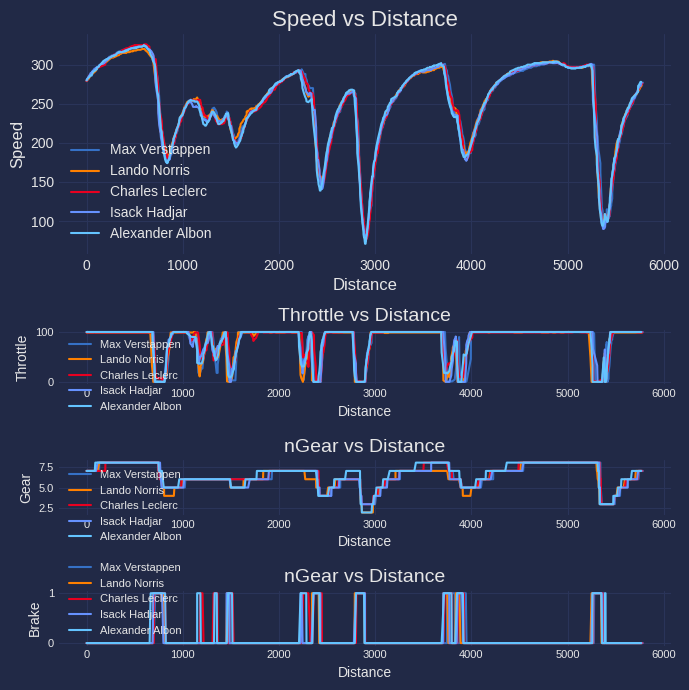

In [21]:
def hex_to_rgb(hex_color):
    hex_color = hex_color.lstrip("#")
    r, g, b = [int(hex_color[i : i + 2], 16) for i in (0, 2, 4)]
    return (r / 255, g / 255, b / 255)


def get_driver_color(driver_abbreviation):
    driver = quali.get_driver(driver_abbreviation)
    team_color = driver.TeamColor
    return hex_to_rgb(team_color)


plt.style.use("cyberpunk")

fig, ax = plt.subplots(4, 1, figsize=(7, 7), gridspec_kw={"height_ratios": [4, 1, 1, 1]})

ax[0].plot(
    tele_ver_quali.Distance, tele_ver_quali.Speed, label="Max Verstappen", color=get_driver_color("VER")
)
ax[0].plot(
    tele_nor_quali.Distance, tele_nor_quali.Speed, label="Lando Norris", color=get_driver_color("NOR")
)
ax[0].plot(
    tele_lec_quali.Distance, tele_lec_quali.Speed, label="Charles Leclerc", color=get_driver_color("LEC")
)
ax[0].plot(
    tele_had_quali.Distance, tele_had_quali.Speed, label="Isack Hadjar", color=get_driver_color("HAD")
)
ax[0].plot(
    tele_alb_quali.Distance, tele_alb_quali.Speed, label="Alexander Albon", color=get_driver_color("ALB")
)

ax[0].set_title("Speed vs Distance", fontsize=16)
ax[0].set_xlabel("Distance", fontsize=12)
ax[0].set_ylabel("Speed", fontsize=12)
ax[0].legend(fontsize=10)
ax[0].grid(True)
ax[0].tick_params(axis="both", which="major", labelsize=10)
ax[1].plot(
    tele_ver_quali.Distance, tele_ver_quali.Throttle, label="Max Verstappen", color=get_driver_color("VER")
)
ax[1].plot(
    tele_nor_quali.Distance, tele_nor_quali.Throttle, label="Lando Norris", color=get_driver_color("NOR")
)
ax[1].plot(
    tele_lec_quali.Distance, tele_lec_quali.Throttle, label="Charles Leclerc", color=get_driver_color("LEC")
)
ax[1].plot(
    tele_had_quali.Distance, tele_had_quali.Throttle, label="Isack Hadjar", color=get_driver_color("HAD")
)
ax[1].plot(
    tele_alb_quali.Distance, tele_alb_quali.Throttle, label="Alexander Albon", color=get_driver_color("ALB")
)

ax[1].set_title("Throttle vs Distance", fontsize=14)
ax[1].set_xlabel("Distance", fontsize=10)
ax[1].set_ylabel("Throttle", fontsize=10)
ax[1].legend(fontsize=8)
ax[1].grid(True)
ax[1].tick_params(axis="both", which="major", labelsize=8)
ax[2].plot(
    tele_ver_quali.Distance, tele_ver_quali.nGear, label="Max Verstappen", color=get_driver_color("VER")
)
ax[2].plot(
    tele_nor_quali.Distance, tele_nor_quali.nGear, label="Lando Norris", color=get_driver_color("NOR")
)
ax[2].plot(
    tele_lec_quali.Distance, tele_lec_quali.nGear, label="Charles Leclerc", color=get_driver_color("LEC")
)
ax[2].plot(
    tele_had_quali.Distance, tele_had_quali.nGear, label="Isack Hadjar", color=get_driver_color("HAD")
)
ax[2].plot(
    tele_alb_quali.Distance, tele_alb_quali.nGear, label="Alexander Albon", color=get_driver_color("ALB")
)

ax[2].set_title("nGear vs Distance", fontsize=14)
ax[2].set_xlabel("Distance", fontsize=10)
ax[2].set_ylabel("Gear", fontsize=10)
ax[2].legend(fontsize=8)
ax[2].grid(True)
ax[2].tick_params(axis="both", which="major", labelsize=8)
ax[3].plot(
    tele_ver_quali.Distance, tele_ver_quali.Brake, label="Max Verstappen", color=get_driver_color("VER")
)
ax[3].plot(
    tele_nor_quali.Distance, tele_nor_quali.Brake, label="Lando Norris", color=get_driver_color("NOR")
)
ax[3].plot(
    tele_lec_quali.Distance, tele_lec_quali.Brake, label="Charles Leclerc", color=get_driver_color("LEC")
)
ax[3].plot(
    tele_had_quali.Distance, tele_had_quali.Brake, label="Isack Hadjar", color=get_driver_color("HAD")
)
ax[3].plot(
    tele_alb_quali.Distance, tele_alb_quali.Brake, label="Alexander Albon", color=get_driver_color("ALB")
)

ax[3].set_title("nGear vs Distance", fontsize=14)
ax[3].set_xlabel("Distance", fontsize=10)
ax[3].set_ylabel("Brake", fontsize=10)
ax[3].legend(fontsize=8)
ax[3].grid(True)
ax[3].tick_params(axis="both", which="major", labelsize=8)

plt.tight_layout()
plt.show()


In [22]:
driver1_sectors = pd.DataFrame(
    {
         "Driver": ["Max Verstappen"] * len(ver_quali_sec1),
        "Sector1Time": ver_quali_sec1,
        "Sector2Time": ver_quali_sec2,
        "Sector3Time": ver_quali_sec3,
        "Lap Time": ver_quali_lap_time,
    }
)


driver2_sectors = pd.DataFrame(
    {
         "Driver": ["Lando Norris"] * len(nor_quali_sec1),
        "Sector1Time": nor_quali_sec1,
        "Sector2Time": nor_quali_sec2,
        "Sector3Time": nor_quali_sec3,
        "Lap Time": nor_quali_lap_time,
    }
)


driver3_sectors = pd.DataFrame(
    {
         "Driver": ["Charles Leclerc"] * len(lec_quali_sec1),
        "Sector1Time": lec_quali_sec1,
        "Sector2Time": lec_quali_sec2,
        "Sector3Time": lec_quali_sec3,
        "Lap Time": lec_quali_lap_time,
    }
)


driver4_sectors = pd.DataFrame(
    {
         "Driver": ["Isack Hadjar"] * len(had_quali_sec1),
        "Sector1Time": had_quali_sec1,
        "Sector2Time": had_quali_sec2,
        "Sector3Time": had_quali_sec3,
        "Lap Time": had_quali_lap_time,
    }
)


driver5_sectors = pd.DataFrame(
    {
         "Driver": ["Alexander Albon"] * len(alb_quali_sec1),
        "Sector1Time": alb_quali_sec1,
        "Sector2Time": alb_quali_sec2,
        "Sector3Time": alb_quali_sec3,
        "Lap Time": alb_quali_lap_time,
    }
)


all_drivers_sectors = pd.concat(
    [driver1_sectors, driver2_sectors, driver3_sectors, driver4_sectors, driver5_sectors],
    ignore_index=True,
)
all_drivers_sectors.sort_values(
    by=["Sector1Time", "Sector2Time", "Sector3Time"], ascending=True
)
all_drivers_sectors.dropna()

,Driver,Sector1Time,Sector2Time,Sector3Time,Lap Time
1,Max Verstappen,0 days 00:00:30.856000,0 days 00:00:40.015000,0 days 00:00:17.489000,0 days 00:01:28.360000
2,Max Verstappen,0 days 00:00:45.737000,0 days 00:00:52.077000,0 days 00:00:26.490000,0 days 00:02:04.304000
4,Max Verstappen,0 days 00:00:30.696000,0 days 00:00:39.718000,0 days 00:00:17.529000,0 days 00:01:27.943000
5,Max Verstappen,0 days 00:00:40.294000,0 days 00:00:46.588000,0 days 00:00:23.767000,0 days 00:01:50.649000
7,Max Verstappen,0 days 00:00:30.510000,0 days 00:00:39.641000,0 days 00:00:17.351000,0 days 00:01:27.502000
8,Max Verstappen,0 days 00:00:44.853000,0 days 00:00:54.756000,0 days 00:00:24.788000,0 days 00:02:04.397000
10,Max Verstappen,0 days 00:00:30.555000,0 days 00:00:42.782000,0 days 00:00:24.536000,0 days 00:01:37.873000
12,Max Verstappen,0 days 00:00:30.463000,0 days 00:00:39.463000,0 days 00:00:17.352000,0 days 00:01:27.278000
13,Max Verstappen,0 days 00:00:36.082000,0 days 00:00:45.033000,0 days 00:00:21.766000,0 days 00:01:42.881000
15,Max Verstappen,0 days 00:00:30.387000,0 days 00:00:39.355000,0 days 00:00:17.241000,0 days 00:01:26.983000


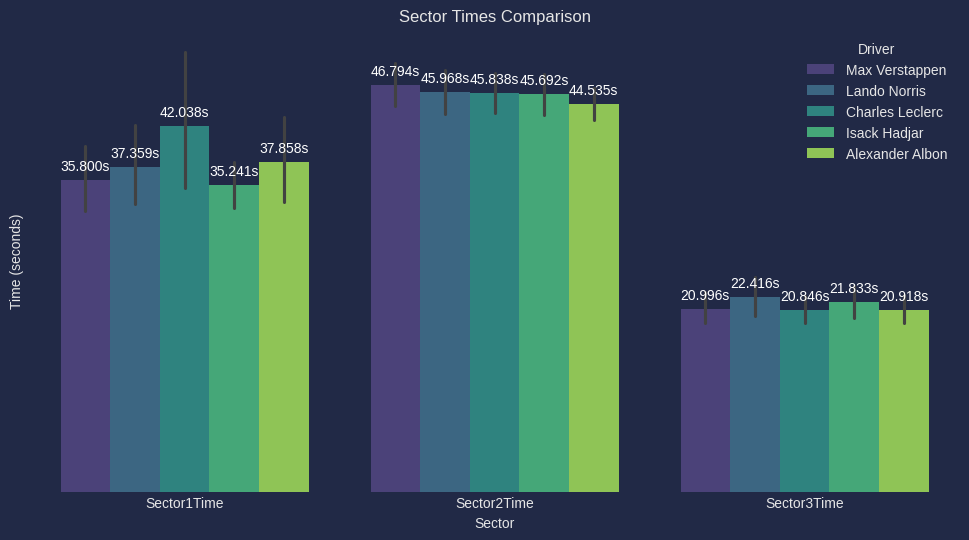

In [23]:
melted_data = all_drivers_sectors.melt(
    id_vars=["Driver"],
    value_vars=["Sector1Time", "Sector2Time", "Sector3Time"],
    var_name="Sector",
    value_name="Time",
)

melted_data["Time"] = melted_data["Time"].dt.total_seconds()

plt.figure(figsize=(12, 6))

bar_plot = sns.barplot(
    data=melted_data, x="Sector", y="Time", hue="Driver", palette="viridis"
)

for p in bar_plot.patches:
    height = p.get_height()
    if not pd.isna(height) and height > 0:
        bar_plot.annotate(
            f"{height:.3f}s",
            (p.get_x() + p.get_width() / 2.0, height),
            ha="center",
        va="bottom",
            fontsize=10,
            color="white",
            xytext=(0, 5),
            textcoords="offset points",
        )

plt.title("Sector Times Comparison")
plt.ylabel("Time (seconds)")
plt.xlabel("Sector")
plt.gca().set_yticks([])
plt.show()

*Race*

In [24]:
race = f1.get_session(2025, "Japan", "R")
race.load()

core           INFO 	Loading data for Japanese Grand Prix - Race [v3.4.4]
req            INFO 	Using cached data for session_info
req            INFO 	Using cached data for driver_info
core        WARNING 	No result data for this session available on Ergast! (This is expected for recent sessions)
req            INFO 	Using cached data for session_status_data
req            INFO 	Using cached data for lap_count
req            INFO 	Using cached data for track_status_data
req            INFO 	Using cached data for _extended_timing_data
req            INFO 	Using cached data for timing_app_data
core           INFO 	Processing timing data...
core        WARNING 	Cannot load lap times for first lap from Ergast. Timing data is not available for this session.
req            INFO 	Using cached data for car_data
req            INFO 	Using cached data for position_data
req            INFO 	Using cached data for weather_data
req            INFO 	Using cached data for race_control_messages
core   

In [25]:
race.session_info

{'Meeting': {'Key': 1256,
  'Name': 'Japanese Grand Prix',
  'OfficialName': 'FORMULA 1 LENOVO JAPANESE GRAND PRIX 2025 ',
  'Location': 'Suzuka',
  'Number': 3,
  'Country': {'Key': 4, 'Code': 'JPN', 'Name': 'Japan'},
  'Circuit': {'Key': 46, 'ShortName': 'Suzuka'}},
 'ArchiveStatus': {'Status': 'Generating'},
 'Key': 10006,
 'Type': 'Race',
 'Name': 'Race',
 'StartDate': datetime.datetime(2025, 4, 6, 14, 0),
 'EndDate': datetime.datetime(2025, 4, 6, 16, 0),
 'GmtOffset': datetime.timedelta(seconds=32400),
 'Path': '2025/2025-04-06_Japanese_Grand_Prix/2025-04-06_Race/'}

In [26]:
race.results.loc[
    :, ["Abbreviation", "TeamName", "GridPosition", "Position", "Time", "Status"]
]

,Abbreviation,TeamName,GridPosition,Position,Time,Status
1,VER,Red Bull Racing,NaN,NaN,NaT,
4,NOR,McLaren,NaN,NaN,NaT,
81,PIA,McLaren,NaN,NaN,NaT,
16,LEC,Ferrari,NaN,NaN,NaT,
63,RUS,Mercedes,NaN,NaN,NaT,
12,ANT,Mercedes,NaN,NaN,NaT,
6,HAD,Racing Bulls,NaN,NaN,NaT,
44,HAM,Ferrari,NaN,NaN,NaT,
23,ALB,Williams,NaN,NaN,NaT,
87,BEA,Haas F1 Team,NaN,NaN,NaT,


In [27]:
race_laps = race.laps
race_laps

,Time,Driver,DriverNumber,LapTime,LapNumber,Stint,PitOutTime,PitInTime,Sector1Time,Sector2Time,...,FreshTyre,Team,LapStartTime,LapStartDate,TrackStatus,Position,Deleted,DeletedReason,FastF1Generated,IsAccurate
0,0 days 00:57:41.653000,VER,1,NaT,1.0,1.0,NaT,NaT,NaT,0 days 00:00:41.962000,...,True,Red Bull Racing,0 days 00:56:06.651000,2025-04-06 05:03:47.081,1,1.0,False,,False,False
1,0 days 00:59:15.596000,VER,1,0 days 00:01:33.943000,2.0,1.0,NaT,NaT,0 days 00:00:33.894000,0 days 00:00:42.026000,...,True,Red Bull Racing,0 days 00:57:41.653000,2025-04-06 05:05:22.083,1,1.0,False,,False,True
2,0 days 01:00:49.235000,VER,1,0 days 00:01:33.639000,3.0,1.0,NaT,NaT,0 days 00:00:33.567000,0 days 00:00:42.027000,...,True,Red Bull Racing,0 days 00:59:15.596000,2025-04-06 05:06:56.026,1,1.0,False,,False,True
3,0 days 01:02:22.979000,VER,1,0 days 00:01:33.744000,4.0,1.0,NaT,NaT,0 days 00:00:33.570000,0 days 00:00:42.140000,...,True,Red Bull Racing,0 days 01:00:49.235000,2025-04-06 05:08:29.665,1,1.0,False,,False,True
4,0 days 01:03:56.755000,VER,1,0 days 00:01:33.776000,5.0,1.0,NaT,NaT,0 days 00:00:33.486000,0 days 00:00:42.157000,...,True,Red Bull Racing,0 days 01:02:22.979000,2025-04-06 05:10:03.409,1,1.0,False,,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1054,0 days 02:12:18.051000,STR,18,0 days 00:01:32.545000,48.0,3.0,NaT,NaT,0 days 00:00:32.199000,0 days 00:00:42.172000,...,False,Aston Martin,0 days 02:10:45.506000,2025-04-06 06:18:25.936,1,20.0,False,,False,True
1055,0 days 02:13:50.425000,STR,18,0 days 00:01:32.374000,49.0,3.0,NaT,NaT,0 days 00:00:32.143000,0 days 00:00:42.060000,...,False,Aston Martin,0 days 02:12:18.051000,2025-04-06 06:19:58.481,1,20.0,False,,False,True
1056,0 days 02:15:22.642000,STR,18,0 days 00:01:32.217000,50.0,3.0,NaT,NaT,0 days 00:00:31.968000,0 days 00:00:42.084000,...,False,Aston Martin,0 days 02:13:50.425000,2025-04-06 06:21:30.855,1,20.0,False,,False,True
1057,0 days 02:16:54.788000,STR,18,0 days 00:01:32.146000,51.0,3.0,NaT,NaT,0 days 00:00:31.901000,0 days 00:00:42.103000,...,False,Aston Martin,0 days 02:15:22.642000,2025-04-06 06:23:03.072,1,20.0,False,,False,True


In [28]:
ver_race_laps = race.laps.pick_driver("VER")
fastest_lap_ver_race = ver_race_laps.pick_fastest().LapTime
ver_race_lap_time = ver_race_laps["LapTime"]
ver_race_sec1 = ver_race_laps["Sector1Time"]
ver_race_sec2 = ver_race_laps["Sector2Time"]
ver_race_sec3 = ver_race_laps["Sector3Time"]
print("Fastest Lap:", convert_to_normal(fastest_lap_ver_race), "which was in Lap number" ,ver_race_laps.pick_fastest().LapNumber)
ver_race_laps.loc[:,["LapTime","Sector1Time","Sector2Time","Sector3Time","SpeedI1","SpeedI2","SpeedFL","SpeedST"]].head()

Fastest Lap: 01:31.041000 which was in Lap number 52.0


/home/sohamdesai/Coding/F1-data-analysis/.venv/lib/python3.12/site-packages/fastf1/core.py:3022: FutureWarning: pick_driver is deprecated and will be removed in a future release. Use pick_drivers instead.
  warnings.warn(("pick_driver is deprecated and will be removed"


,LapTime,Sector1Time,Sector2Time,Sector3Time,SpeedI1,SpeedI2,SpeedFL,SpeedST
0,NaT,NaT,0 days 00:00:41.962000,0 days 00:00:18.147000,281.0,295.0,262.0,293.0
1,0 days 00:01:33.943000,0 days 00:00:33.894000,0 days 00:00:42.026000,0 days 00:00:18.023000,279.0,296.0,262.0,295.0
2,0 days 00:01:33.639000,0 days 00:00:33.567000,0 days 00:00:42.027000,0 days 00:00:18.045000,282.0,296.0,262.0,296.0
3,0 days 00:01:33.744000,0 days 00:00:33.570000,0 days 00:00:42.140000,0 days 00:00:18.034000,283.0,296.0,263.0,296.0
4,0 days 00:01:33.776000,0 days 00:00:33.486000,0 days 00:00:42.157000,0 days 00:00:18.133000,NaN,297.0,263.0,298.0


In [29]:
fastest_lap_ver_race = ver_race_laps.pick_fastest()
tele_ver_race = fastest_lap_ver_race.get_telemetry().add_distance()
speed_ver_race = tele_ver_race.Speed
tele_ver_race.loc[:, ["Speed", "nGear", "RPM"]]

core        WARNING 	Failed to preserve data type for column 'X' while merging telemetry.
core        WARNING 	Failed to preserve data type for column 'Y' while merging telemetry.
core        WARNING 	Failed to preserve data type for column 'Z' while merging telemetry.


,Speed,nGear,RPM
2,274,7,10928
3,275,7,10928
4,278,7,11054
5,282,7,11181
6,282,7,11194
...,...,...,...
681,266,6,10944
682,269,7,10714
683,271,7,10799
684,273,7,10884


In [30]:
nor_race_laps = race.laps.pick_driver("NOR")
fastest_lap_nor_race = nor_race_laps.pick_fastest().LapTime
nor_race_lap_time = nor_race_laps["LapTime"]
nor_race_sec1 = nor_race_laps["Sector1Time"]
nor_race_sec2 = nor_race_laps["Sector2Time"]
nor_race_sec3 = nor_race_laps["Sector3Time"]
print("Fastest Lap:", convert_to_normal(fastest_lap_nor_race), "which was in Lap number" ,nor_race_laps.pick_fastest().LapNumber)
nor_race_laps.loc[:,["LapTime","Sector1Time","Sector2Time","Sector3Time","SpeedI1","SpeedI2","SpeedFL","SpeedST"]].head()

Fastest Lap: 01:31.116000 which was in Lap number 51.0


/home/sohamdesai/Coding/F1-data-analysis/.venv/lib/python3.12/site-packages/fastf1/core.py:3022: FutureWarning: pick_driver is deprecated and will be removed in a future release. Use pick_drivers instead.
  warnings.warn(("pick_driver is deprecated and will be removed"


,LapTime,Sector1Time,Sector2Time,Sector3Time,SpeedI1,SpeedI2,SpeedFL,SpeedST
53,NaT,NaT,0 days 00:00:42.210000,0 days 00:00:18.262000,281.0,296.0,262.0,291.0
54,0 days 00:01:33.947000,0 days 00:00:33.809000,0 days 00:00:42.049000,0 days 00:00:18.089000,NaN,298.0,266.0,295.0
55,0 days 00:01:33.789000,0 days 00:00:33.515000,0 days 00:00:42.096000,0 days 00:00:18.178000,282.0,298.0,263.0,293.0
56,0 days 00:01:33.838000,0 days 00:00:33.576000,0 days 00:00:42.123000,0 days 00:00:18.139000,278.0,298.0,264.0,298.0
57,0 days 00:01:33.947000,0 days 00:00:33.620000,0 days 00:00:42.142000,0 days 00:00:18.185000,NaN,299.0,263.0,295.0


In [31]:
fastest_lap_nor_race = nor_race_laps.pick_fastest()
tele_nor_race = fastest_lap_nor_race.get_telemetry().add_distance()
speed_nor_race = tele_nor_race.Speed
tele_nor_race.loc[:, ["Speed", "nGear", "RPM"]]

core        WARNING 	Failed to preserve data type for column 'X' while merging telemetry.
core        WARNING 	Failed to preserve data type for column 'Y' while merging telemetry.
core        WARNING 	Failed to preserve data type for column 'Z' while merging telemetry.


,Speed,nGear,RPM
2,275,7,10997
3,276,7,11020
4,278,7,11065
5,280,7,11185
6,280,7,11206
...,...,...,...
680,271,7,10811
681,273,7,10948
682,274,7,11003
683,276,7,11059


In [32]:
lec_race_laps = race.laps.pick_driver("LEC")
fastest_lap_lec_race = lec_race_laps.pick_fastest().LapTime
lec_race_lap_time = lec_race_laps["LapTime"]
lec_race_sec1 = lec_race_laps["Sector1Time"]
lec_race_sec2 = lec_race_laps["Sector2Time"]
lec_race_sec3 = lec_race_laps["Sector3Time"]
print("Fastest Lap:", convert_to_normal(fastest_lap_lec_race), "which was in Lap number" ,lec_race_laps.pick_fastest().LapNumber)
lec_race_laps.loc[:,["LapTime","Sector1Time","Sector2Time","Sector3Time","SpeedI1","SpeedI2","SpeedFL","SpeedST"]].head()

Fastest Lap: 01:31.469000 which was in Lap number 47.0


/home/sohamdesai/Coding/F1-data-analysis/.venv/lib/python3.12/site-packages/fastf1/core.py:3022: FutureWarning: pick_driver is deprecated and will be removed in a future release. Use pick_drivers instead.
  warnings.warn(("pick_driver is deprecated and will be removed"


,LapTime,Sector1Time,Sector2Time,Sector3Time,SpeedI1,SpeedI2,SpeedFL,SpeedST
159,NaT,NaT,0 days 00:00:42.344000,0 days 00:00:18.096000,281.0,300.0,263.0,298.0
160,0 days 00:01:34.121000,0 days 00:00:34.083000,0 days 00:00:42.034000,0 days 00:00:18.004000,277.0,300.0,264.0,295.0
161,0 days 00:01:34.129000,0 days 00:00:33.829000,0 days 00:00:42.223000,0 days 00:00:18.077000,275.0,300.0,266.0,291.0
162,0 days 00:01:33.954000,0 days 00:00:33.762000,0 days 00:00:42.115000,0 days 00:00:18.077000,276.0,300.0,266.0,293.0
163,0 days 00:01:33.878000,0 days 00:00:33.469000,0 days 00:00:42.300000,0 days 00:00:18.109000,277.0,300.0,265.0,295.0


In [33]:
fastest_lap_lec_race = lec_race_laps.pick_fastest()
tele_lec_race = fastest_lap_lec_race.get_telemetry().add_distance()
speed_lec_race = tele_lec_race.Speed
tele_lec_race.loc[:, ["Speed", "nGear", "RPM"]]

core        WARNING 	Failed to preserve data type for column 'X' while merging telemetry.
core        WARNING 	Failed to preserve data type for column 'Y' while merging telemetry.
core        WARNING 	Failed to preserve data type for column 'Z' while merging telemetry.


,Speed,nGear,RPM
2,274,7,10993
3,275,7,11025
4,277,7,11119
5,279,7,11204
6,281,7,11290
...,...,...,...
691,271,7,10860
692,272,7,10902
693,273,7,10945
694,274,7,11015


In [34]:
rus_race_laps = race.laps.pick_driver("RUS")
fastest_lap_rus_race = rus_race_laps.pick_fastest().LapTime
rus_race_lap_time = rus_race_laps["LapTime"]
rus_race_sec1 = rus_race_laps["Sector1Time"]
rus_race_sec2 = rus_race_laps["Sector2Time"]
rus_race_sec3 = rus_race_laps["Sector3Time"]
print("Fastest Lap:", convert_to_normal(fastest_lap_rus_race), "which was in Lap number" ,rus_race_laps.pick_fastest().LapNumber)
rus_race_laps.loc[:,["LapTime","Sector1Time","Sector2Time","Sector3Time","SpeedI1","SpeedI2","SpeedFL","SpeedST"]].head()

Fastest Lap: 01:31.357000 which was in Lap number 51.0


/home/sohamdesai/Coding/F1-data-analysis/.venv/lib/python3.12/site-packages/fastf1/core.py:3022: FutureWarning: pick_driver is deprecated and will be removed in a future release. Use pick_drivers instead.
  warnings.warn(("pick_driver is deprecated and will be removed"


,LapTime,Sector1Time,Sector2Time,Sector3Time,SpeedI1,SpeedI2,SpeedFL,SpeedST
212,NaT,NaT,0 days 00:00:42.500000,0 days 00:00:18.149000,280.0,302.0,266.0,299.0
213,0 days 00:01:34.191000,0 days 00:00:33.985000,0 days 00:00:42.155000,0 days 00:00:18.051000,281.0,303.0,269.0,300.0
214,0 days 00:01:34.204000,0 days 00:00:33.652000,0 days 00:00:42.334000,0 days 00:00:18.218000,283.0,305.0,269.0,301.0
215,0 days 00:01:34.057000,0 days 00:00:33.511000,0 days 00:00:42.480000,0 days 00:00:18.066000,280.0,302.0,270.0,302.0
216,0 days 00:01:33.795000,0 days 00:00:33.241000,0 days 00:00:42.398000,0 days 00:00:18.156000,284.0,303.0,270.0,304.0


In [35]:
fastest_lap_rus_race = rus_race_laps.pick_fastest()
tele_rus_race = fastest_lap_rus_race.get_telemetry().add_distance()
speed_rus_race = tele_rus_race.Speed
tele_rus_race.loc[:, ["Speed", "nGear", "RPM"]]

core        WARNING 	Failed to preserve data type for column 'X' while merging telemetry.
core        WARNING 	Failed to preserve data type for column 'Y' while merging telemetry.
core        WARNING 	Failed to preserve data type for column 'Z' while merging telemetry.


,Speed,nGear,RPM
2,275,7,11320
3,276,7,11373
4,277,7,11479
5,277,7,11494
6,277,7,11509
...,...,...,...
680,267,7,11018
681,268,7,11097
682,270,7,11176
683,277,7,11343


In [36]:
driver1_sectors = pd.DataFrame(
    {
         "Driver": ["Max Verstappen"] * len(ver_race_sec1),
        "Sector1Time": ver_race_sec1,
        "Sector2Time": ver_race_sec2,
        "Sector3Time": ver_race_sec3,
        "Lap Time": ver_race_lap_time,
    }
)


driver2_sectors = pd.DataFrame(
    {
         "Driver": ["Lando Norris"] * len(nor_race_sec1),
        "Sector1Time": nor_race_sec1,
        "Sector2Time": nor_race_sec2,
        "Sector3Time": nor_race_sec3,
        "Lap Time": nor_race_lap_time,
    }
)


driver3_sectors = pd.DataFrame(
    {
         "Driver": ["Charles Leclerc"] * len(lec_race_sec1),
        "Sector1Time": lec_race_sec1,
        "Sector2Time": lec_race_sec2,
        "Sector3Time": lec_race_sec3,
        "Lap Time": lec_race_lap_time,
    }
)


driver4_sectors = pd.DataFrame(
    {
         "Driver": ["George Russell"] * len(rus_race_sec1),
        "Sector1Time": rus_race_sec1,
        "Sector2Time": rus_race_sec2,
        "Sector3Time": rus_race_sec3,
        "Lap Time": rus_race_lap_time,
    }
)


all_drivers_sectors = pd.concat(
    [driver1_sectors, driver2_sectors, driver3_sectors, driver4_sectors],
    ignore_index=True,
)
all_drivers_sectors.sort_values(
    by=["Sector1Time", "Sector2Time", "Sector3Time"], ascending=True
)
all_drivers_sectors.dropna()

,Driver,Sector1Time,Sector2Time,Sector3Time,Lap Time
1,Max Verstappen,0 days 00:00:33.894000,0 days 00:00:42.026000,0 days 00:00:18.023000,0 days 00:01:33.943000
2,Max Verstappen,0 days 00:00:33.567000,0 days 00:00:42.027000,0 days 00:00:18.045000,0 days 00:01:33.639000
3,Max Verstappen,0 days 00:00:33.570000,0 days 00:00:42.140000,0 days 00:00:18.034000,0 days 00:01:33.744000
4,Max Verstappen,0 days 00:00:33.486000,0 days 00:00:42.157000,0 days 00:00:18.133000,0 days 00:01:33.776000
5,Max Verstappen,0 days 00:00:33.319000,0 days 00:00:42.252000,0 days 00:00:18.075000,0 days 00:01:33.646000
...,...,...,...,...,...
207,George Russell,0 days 00:00:31.597000,0 days 00:00:41.947000,0 days 00:00:18.065000,0 days 00:01:31.609000
208,George Russell,0 days 00:00:31.402000,0 days 00:00:41.945000,0 days 00:00:18.023000,0 days 00:01:31.370000
209,George Russell,0 days 00:00:31.474000,0 days 00:00:41.914000,0 days 00:00:17.969000,0 days 00:01:31.357000
210,George Russell,0 days 00:00:31.468000,0 days 00:00:41.982000,0 days 00:00:18.177000,0 days 00:01:31.627000


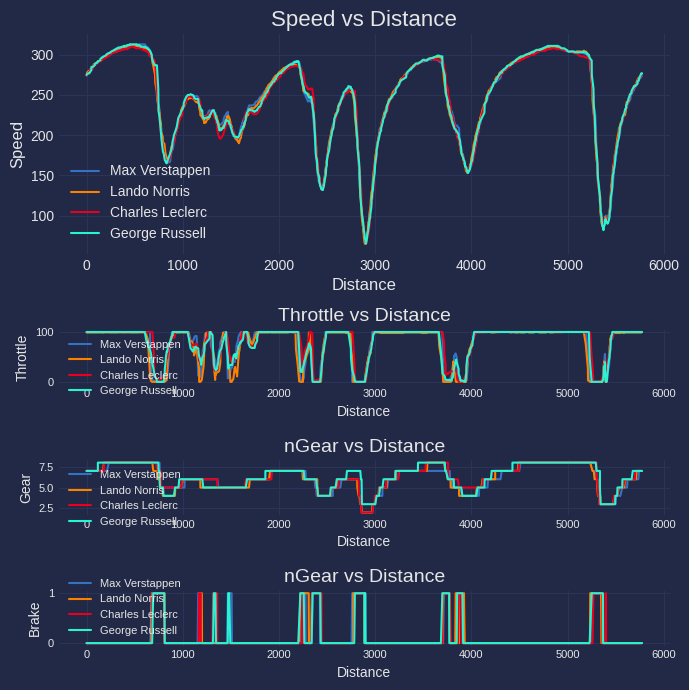

In [37]:
def hex_to_rgb(hex_color):
    hex_color = hex_color.lstrip("#")
    r, g, b = [int(hex_color[i : i + 2], 16) for i in (0, 2, 4)]
    return (r / 255, g / 255, b / 255)


def get_driver_color(driver_abbreviation):
    driver = race.get_driver(driver_abbreviation)
    team_color = driver.TeamColor
    return hex_to_rgb(team_color)


plt.style.use("cyberpunk")

fig, ax = plt.subplots(4, 1, figsize=(7, 7), gridspec_kw={"height_ratios": [4, 1, 1, 1]})

ax[0].plot(
    tele_ver_race.Distance, tele_ver_race.Speed, label="Max Verstappen", color=get_driver_color("VER")
)
ax[0].plot(
    tele_nor_race.Distance, tele_nor_race.Speed, label="Lando Norris", color=get_driver_color("NOR")
)
ax[0].plot(
    tele_lec_race.Distance, tele_lec_race.Speed, label="Charles Leclerc", color=get_driver_color("LEC")
)
ax[0].plot(
    tele_rus_race.Distance, tele_rus_race.Speed, label="George Russell", color=get_driver_color("RUS")
)

ax[0].set_title("Speed vs Distance", fontsize=16)
ax[0].set_xlabel("Distance", fontsize=12)
ax[0].set_ylabel("Speed", fontsize=12)
ax[0].legend(fontsize=10)
ax[0].grid(True)
ax[0].tick_params(axis="both", which="major", labelsize=10)
ax[1].plot(
    tele_ver_race.Distance, tele_ver_race.Throttle, label="Max Verstappen", color=get_driver_color("VER")
)
ax[1].plot(
    tele_nor_race.Distance, tele_nor_race.Throttle, label="Lando Norris", color=get_driver_color("NOR")
)
ax[1].plot(
    tele_lec_race.Distance, tele_lec_race.Throttle, label="Charles Leclerc", color=get_driver_color("LEC")
)
ax[1].plot(
    tele_rus_race.Distance, tele_rus_race.Throttle, label="George Russell", color=get_driver_color("RUS")
)

ax[1].set_title("Throttle vs Distance", fontsize=14)
ax[1].set_xlabel("Distance", fontsize=10)
ax[1].set_ylabel("Throttle", fontsize=10)
ax[1].legend(fontsize=8)
ax[1].grid(True)
ax[1].tick_params(axis="both", which="major", labelsize=8)
ax[2].plot(
    tele_ver_race.Distance, tele_ver_race.nGear, label="Max Verstappen", color=get_driver_color("VER")
)
ax[2].plot(
    tele_nor_race.Distance, tele_nor_race.nGear, label="Lando Norris", color=get_driver_color("NOR")
)
ax[2].plot(
    tele_lec_race.Distance, tele_lec_race.nGear, label="Charles Leclerc", color=get_driver_color("LEC")
)
ax[2].plot(
    tele_rus_race.Distance, tele_rus_race.nGear, label="George Russell", color=get_driver_color("RUS")
)

ax[2].set_title("nGear vs Distance", fontsize=14)
ax[2].set_xlabel("Distance", fontsize=10)
ax[2].set_ylabel("Gear", fontsize=10)
ax[2].legend(fontsize=8)
ax[2].grid(True)
ax[2].tick_params(axis="both", which="major", labelsize=8)
ax[3].plot(
    tele_ver_race.Distance, tele_ver_race.Brake, label="Max Verstappen", color=get_driver_color("VER")
)
ax[3].plot(
    tele_nor_race.Distance, tele_nor_race.Brake, label="Lando Norris", color=get_driver_color("NOR")
)
ax[3].plot(
    tele_lec_race.Distance, tele_lec_race.Brake, label="Charles Leclerc", color=get_driver_color("LEC")
)
ax[3].plot(
    tele_rus_race.Distance, tele_rus_race.Brake, label="George Russell", color=get_driver_color("RUS")
)

ax[3].set_title("nGear vs Distance", fontsize=14)
ax[3].set_xlabel("Distance", fontsize=10)
ax[3].set_ylabel("Brake", fontsize=10)
ax[3].legend(fontsize=8)
ax[3].grid(True)
ax[3].tick_params(axis="both", which="major", labelsize=8)

plt.tight_layout()
plt.show()


In [38]:
driver1_sectors = pd.DataFrame(
    {
         "Driver": ["Max Verstappen"] * len(ver_race_sec1),
        "Sector1Time": ver_race_sec1,
        "Sector2Time": ver_race_sec2,
        "Sector3Time": ver_race_sec3,
        "Lap Time": ver_race_lap_time,
    }
)


driver2_sectors = pd.DataFrame(
    {
         "Driver": ["Lando Norris"] * len(nor_race_sec1),
        "Sector1Time": nor_race_sec1,
        "Sector2Time": nor_race_sec2,
        "Sector3Time": nor_race_sec3,
        "Lap Time": nor_race_lap_time,
    }
)


driver3_sectors = pd.DataFrame(
    {
         "Driver": ["Charles Leclerc"] * len(lec_race_sec1),
        "Sector1Time": lec_race_sec1,
        "Sector2Time": lec_race_sec2,
        "Sector3Time": lec_race_sec3,
        "Lap Time": lec_race_lap_time,
    }
)


driver4_sectors = pd.DataFrame(
    {
         "Driver": ["George Russell"] * len(rus_race_sec1),
        "Sector1Time": rus_race_sec1,
        "Sector2Time": rus_race_sec2,
        "Sector3Time": rus_race_sec3,
        "Lap Time": rus_race_lap_time,
    }
)


all_drivers_sectors = pd.concat(
    [driver1_sectors, driver2_sectors, driver3_sectors, driver4_sectors],
    ignore_index=True,
)
all_drivers_sectors.sort_values(
    by=["Sector1Time", "Sector2Time", "Sector3Time"], ascending=True
)
all_drivers_sectors.dropna()

,Driver,Sector1Time,Sector2Time,Sector3Time,Lap Time
1,Max Verstappen,0 days 00:00:33.894000,0 days 00:00:42.026000,0 days 00:00:18.023000,0 days 00:01:33.943000
2,Max Verstappen,0 days 00:00:33.567000,0 days 00:00:42.027000,0 days 00:00:18.045000,0 days 00:01:33.639000
3,Max Verstappen,0 days 00:00:33.570000,0 days 00:00:42.140000,0 days 00:00:18.034000,0 days 00:01:33.744000
4,Max Verstappen,0 days 00:00:33.486000,0 days 00:00:42.157000,0 days 00:00:18.133000,0 days 00:01:33.776000
5,Max Verstappen,0 days 00:00:33.319000,0 days 00:00:42.252000,0 days 00:00:18.075000,0 days 00:01:33.646000
...,...,...,...,...,...
207,George Russell,0 days 00:00:31.597000,0 days 00:00:41.947000,0 days 00:00:18.065000,0 days 00:01:31.609000
208,George Russell,0 days 00:00:31.402000,0 days 00:00:41.945000,0 days 00:00:18.023000,0 days 00:01:31.370000
209,George Russell,0 days 00:00:31.474000,0 days 00:00:41.914000,0 days 00:00:17.969000,0 days 00:01:31.357000
210,George Russell,0 days 00:00:31.468000,0 days 00:00:41.982000,0 days 00:00:18.177000,0 days 00:01:31.627000


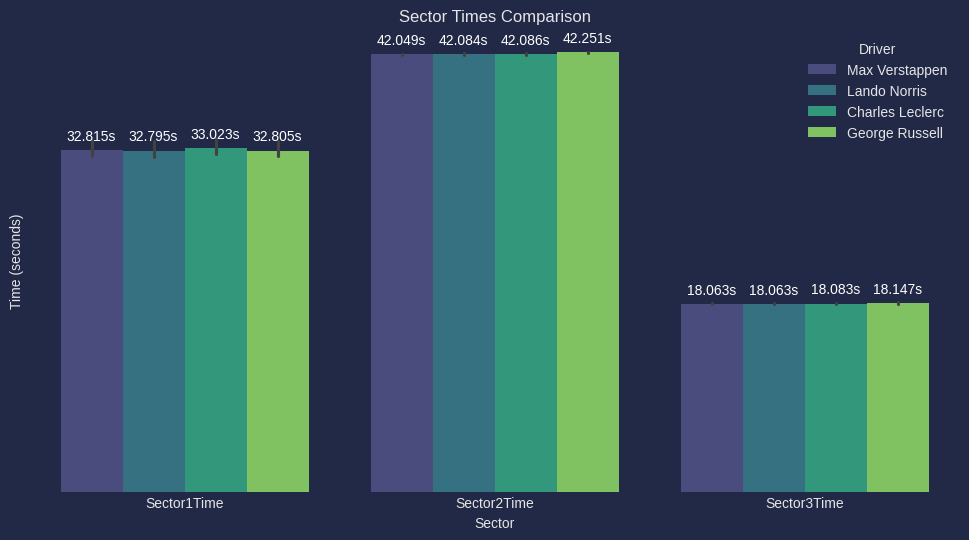

In [39]:
melted_data = all_drivers_sectors.melt(
    id_vars=["Driver"],
    value_vars=["Sector1Time", "Sector2Time", "Sector3Time"],
    var_name="Sector",
    value_name="Time",
)

melted_data["Time"] = melted_data["Time"].dt.total_seconds()

plt.figure(figsize=(12, 6))

bar_plot = sns.barplot(
    data=melted_data, x="Sector", y="Time", hue="Driver", palette="viridis"
)

for p in bar_plot.patches:
    height = p.get_height()
    if not pd.isna(height) and height > 0:
        bar_plot.annotate(
            f"{height:.3f}s",
            (p.get_x() + p.get_width() / 2.0, height),
            ha="center",
        va="bottom",
            fontsize=10,
            color="white",
            xytext=(0, 5),
            textcoords="offset points",
        )

plt.title("Sector Times Comparison")
plt.ylabel("Time (seconds)")
plt.xlabel("Sector")
plt.gca().set_yticks([])
plt.show()

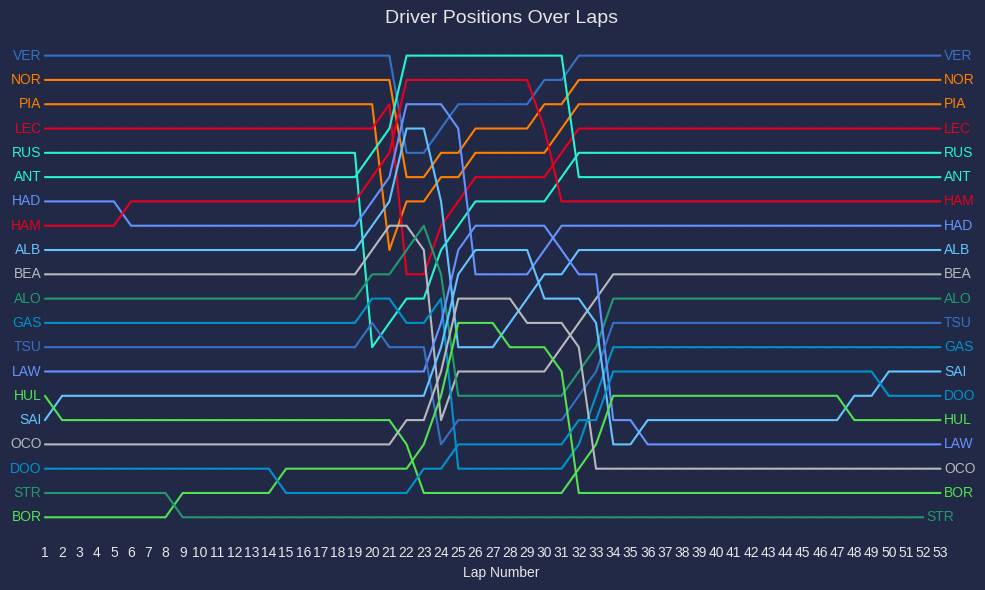

In [40]:
drivers = race.laps.Driver.unique()
drivers_ab = drivers.tolist()
nlaps = int(race.laps.LapNumber.unique().max())

team_colors = {}

for driver in drivers_ab:
    driver_object = race.get_driver(driver)
    hex_color = driver_object.TeamColor
    team_colors[driver] = hex_to_rgb(hex_color)

plt.figure(figsize=(10, 6))
for driver in drivers_ab:
    positions = race_laps[race_laps['Driver'] == driver]['Position'].values  
    color = team_colors.get(driver, (0.5, 0.5, 0.5))
    plt.plot(range(1, len(positions) + 1), positions, label=driver, color=color)
    
    plt.text(
        1 - 0.2,
        positions[0],
        driver,
        color=color,
        fontsize=10,
        verticalalignment='center',
        horizontalalignment='right'
    )
    
    plt.text(
        len(positions) + 0.2,
        positions[-1],
        driver,
        color=color,
        fontsize=10,
        verticalalignment='center',
        horizontalalignment='left'
    )

plt.title("Driver Positions Over Laps", fontsize=14)
plt.grid(True, linestyle=':', alpha=0.5)
plt.xlim(0.5, float(nlaps) + 1.5)
plt.xlabel("Lap Number")
plt.ylim(0, 21)
plt.gca().invert_yaxis()
plt.gca().set_yticks([])
plt.xticks(range(1, nlaps + 1))
plt.tight_layout()
plt.show()

In [ ]:
def getDriverPosition(abbreviation: str):
    res = race.results
    abbr = res["Abbreviation"] == abbreviation
    pos = res.loc[abbr, ["Position"]]
    posi = pos.iloc[-1]
    return int(posi.iloc[0])


def getCompound(abbreviation: str):
    driver_race = race.laps.pick_driver(abbreviation)
    lastLap = driver_race.LapNumber.count()
    if driver_race["TyreLife"].iloc[0] == 1.0:
        condition = driver_race["TyreLife"] == 1
        driver_comp = driver_race.loc[condition, ["Compound", "LapNumber"]]
        compound = driver_comp.Compound.tolist()
        return compound, driver_comp, lastLap
    else:
        compound = []
        result = []
        for i in range(0, len(driver_race["TyreLife"])):
            if driver_race["TyreLife"].iloc[i] < driver_race["TyreLife"].iloc[i - 1]:
                result.append(
                    {
                        "Compound": driver_race["Compound"].iloc[i],
                        "LapNumber": driver_race["LapNumber"].iloc[i],
                    }
                )
                compound.append(driver_race["Compound"].iloc[i])

        driver_comp = pd.DataFrame(result)
        return compound, driver_comp, lastLap


fig, ax = plt.subplots(figsize=(10, 6))

color_mapping = {
    "MEDIUM": "yellow",
    "SOFT": "red",
    "HARD": "white",
    "INTERMEDIATE": "green",
    "WET": "blue",
}
drivers = race.laps.Driver.unique()
drivers_ab = drivers.tolist()
used_labels = set()
for driver in drivers_ab:
    compound, driver_comp, lastLap = getCompound(driver)

    list1 = driver_comp.LapNumber.tolist()
    list1.append(lastLap)
    int_list = [int(x) for x in list1]
    x_points = int_list
    n = len(int_list)
    posi = getDriverPosition(driver)
    y_points = [posi] * n

    for i in range(len(driver_comp.LapNumber)):
        x_segment = [x_points[i], x_points[i + 1]]
        y_segment = [y_points[i], y_points[i + 1]]
        tire_color = color_mapping.get(compound[i], "#000000")
        label = compound[i] if compound[i] not in used_labels else None
        
        ax.plot(x_segment, y_segment, color=tire_color, linewidth=2, label=label)
        used_labels.add(compound[i])

        ax.text(
            x_points[i + 1],
            y_points[i + 1],
            str(x_points[i + 1]),
            fontsize=12,
            ha="center",
            va="center",
            bbox=dict(facecolor="black", edgecolor="white", pad=1),
        )
        ax.annotate(f'{i}',
                xy=(0, 1),
                xytext=(-10, 0),
                textcoords='offset points',
                va='center',
                ha='right',
                color="white",
                fontweight='bold')
    ax.text(
        x_points[0], 
        y_points[0], 
        driver, 
        fontsize=12, 
        ha='right', 
        va='center', 
        color="white", 
        fontweight='bold',
    )
    
ax.set_xlim(1, 53)
ax.invert_yaxis()
ax.set_ylim(21, 0)
ax.set_title("Pit Stop Strategy Position wise")
ax.set_xlabel("Laps")
plt.gca().set_yticks([])
ax.axvline(x=0, color='black', linewidth=2)
ax.grid(True, linestyle="-", alpha=0.7)
plt.legend(bbox_to_anchor=(1.05, 1), loc="upper left", borderaxespad=0.0)
plt.show()

In [43]:
res = race.results
drivers = res['Abbreviation'].tolist()
fastest_speed = pd.DataFrame(columns=['Driver', 'Speed'])
for i in drivers:
    tele = race.laps.pick_driver(i)
    speed = tele.SpeedST.max()
    df = pd.DataFrame({'Driver': [i], 'Speed': [speed]})
    fastest_speed = pd.concat([fastest_speed, df], ignore_index=True)
fastest_speed.sort_values(by="Speed",ascending=True)


/home/sohamdesai/Coding/F1-data-analysis/.venv/lib/python3.12/site-packages/fastf1/core.py:3022: FutureWarning: pick_driver is deprecated and will be removed in a future release. Use pick_drivers instead.
  warnings.warn(("pick_driver is deprecated and will be removed"
/tmp/ipykernel_4233/905247657.py:8: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  fastest_speed = pd.concat([fastest_speed, df], ignore_index=True)


,Driver,Speed
18,DOO,301.0
11,ALO,302.0
10,GAS,303.0
3,LEC,303.0
19,STR,303.0
13,TSU,303.0
9,BEA,304.0
1,NOR,304.0
5,ANT,304.0
17,OCO,304.0


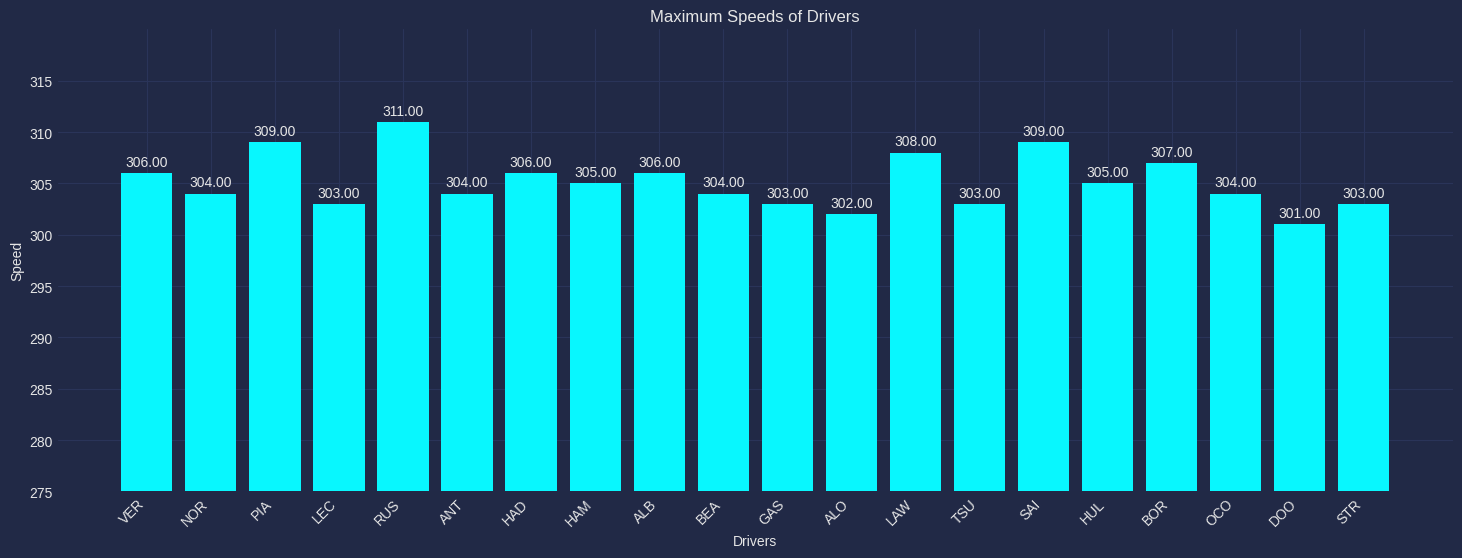

In [44]:
fig,ax = plt.subplots(figsize=(18, 6))
bars = ax.bar(fastest_speed['Driver'], fastest_speed['Speed'])
ax.set_xlabel('Drivers')
ax.set_ylabel('Speed')
ax.set_title('Maximum Speeds of Drivers')
plt.xticks(rotation=45, ha='right')

y_min = 275
y_max = np.ceil(fastest_speed['Speed'].max() / 5) * 5 + 5
y_ticks = np.arange(y_min, y_max, 5)
ax.set_ylim(y_min, y_max)
ax.set_yticks(y_ticks)

for bar in bars:
    height = bar.get_height()
    ax.annotate('{:.2f}'.format(height),
                xy=(bar.get_x() + bar.get_width() / 2, height),
                xytext=(0, 3),
                textcoords="offset points",
                ha='center', va='bottom')

plt.show()

In [45]:
plotting.setup_mpl()

/home/sohamdesai/Coding/F1-data-analysis/.venv/lib/python3.12/site-packages/fastf1/plotting/_plotting.py:90: FutureWarning: FastF1 will no longer silently modify the default Matplotlib colors in the future.
To remove this warning, explicitly set `color_scheme=None` or `color_scheme='fastf1'` when calling `.setup_mpl()`.
  warnings.warn(
/home/sohamdesai/Coding/F1-data-analysis/.venv/lib/python3.12/site-packages/fastf1/plotting/_plotting.py:98: FutureWarning: FastF1 will stop modifying the default Matplotlib settings in the future.
To opt-in to the new behaviour and remove this warning, explicitly set `misc_mpl_mods=False` when calling `.setup_mpl()`.
  warnings.warn(


In [56]:
laps_ver = race_laps.pick_driver("VER")
laps_nor = race_laps.pick_driver("NOR")

fastest_ver = laps_ver.pick_fastest().get_telemetry().add_distance()
fastest_nor = laps_nor.pick_fastest().get_telemetry().add_distance()

fastest_ver["Driver"] = "VER"
fastest_nor["Driver"] = "NOR"
telemetry = pd.concat([fastest_ver,fastest_nor])

/home/sohamdesai/Coding/F1-data-analysis/.venv/lib/python3.12/site-packages/fastf1/core.py:3022: FutureWarning: pick_driver is deprecated and will be removed in a future release. Use pick_drivers instead.
  warnings.warn(("pick_driver is deprecated and will be removed"
core        WARNING 	Failed to preserve data type for column 'X' while merging telemetry.
core        WARNING 	Failed to preserve data type for column 'Y' while merging telemetry.
core        WARNING 	Failed to preserve data type for column 'Z' while merging telemetry.
core        WARNING 	Failed to preserve data type for column 'X' while merging telemetry.
core        WARNING 	Failed to preserve data type for column 'Y' while merging telemetry.
core        WARNING 	Failed to preserve data type for column 'Z' while merging telemetry.


In [57]:
num_minisectors = 25
total_distance = total_distance = max(telemetry['Distance'])
minisector_length = total_distance / num_minisectors
minisectors = [0]
for i in range(0, (num_minisectors - 1)):
    minisectors.append(minisector_length * (i + 1))
telemetry['Minisector'] = telemetry['Distance'].apply(
    lambda dist: (
        int((dist // minisector_length) + 1)
    )
)

In [58]:
average_speed = telemetry.groupby(['Minisector', 'Driver'])['Speed'].mean().reset_index()
average_speed

,Minisector,Driver,Speed
0,1,NOR,288.920000
1,1,VER,288.450000
2,2,NOR,308.000000
3,2,VER,305.818182
4,3,NOR,306.473684
5,3,VER,309.571429
6,4,NOR,202.676471
7,4,VER,198.593750
8,5,NOR,235.607143
9,5,VER,234.793103


In [59]:
fastest_driver = average_speed.loc[average_speed.groupby(['Minisector'])['Speed'].idxmax()]

fastest_driver = fastest_driver[['Minisector', 'Driver']].rename(columns={'Driver': 'Fastest_driver'})


In [60]:
telemetry = telemetry.merge(fastest_driver, on=['Minisector'])

telemetry = telemetry.sort_values(by=['Distance'])

telemetry.loc[telemetry['Fastest_driver'] == 'VER', 'Fastest_driver_int'] = 1
telemetry.loc[telemetry['Fastest_driver'] == 'NOR', 'Fastest_driver_int'] = 2

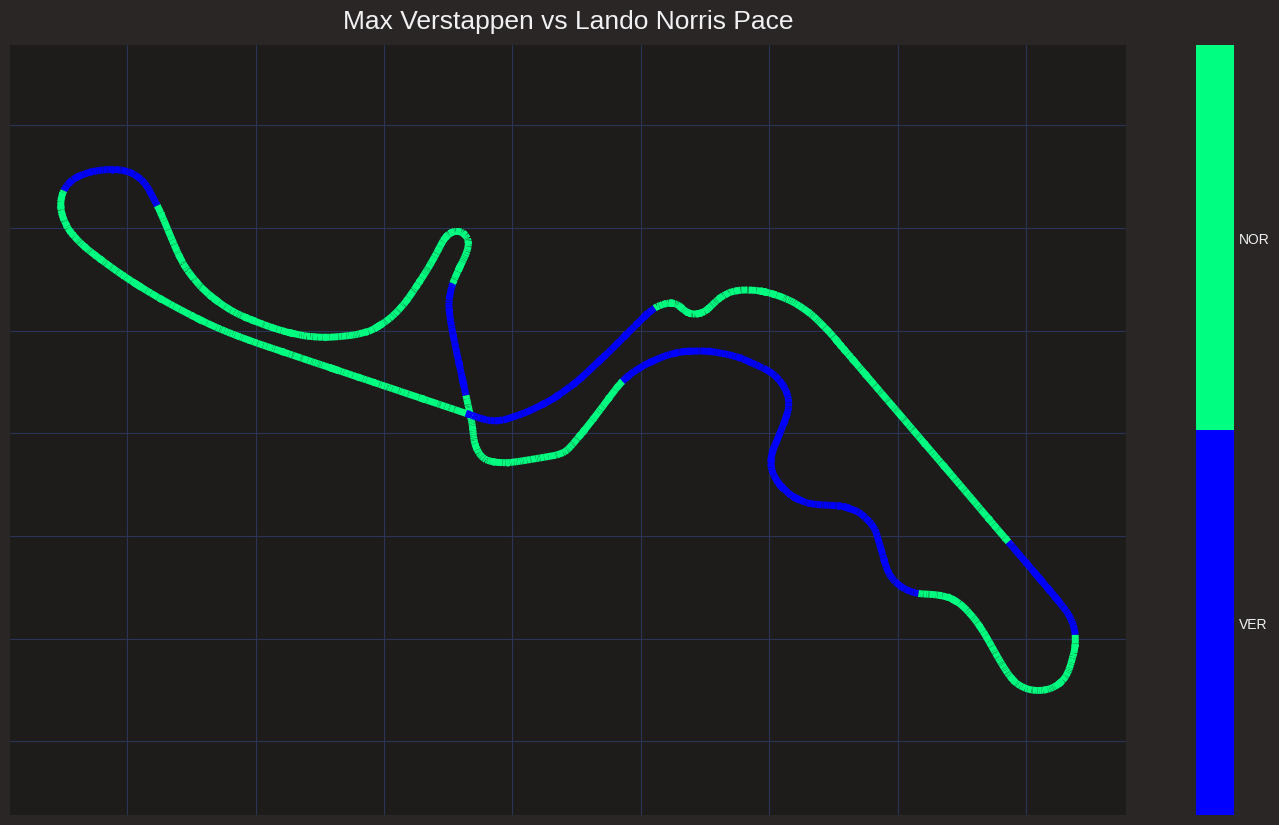

In [61]:
x = np.array(telemetry['X'].values)
y = np.array(telemetry['Y'].values)

points = np.array([x, y]).T.reshape(-1, 1, 2)
segments = np.concatenate([points[:-1], points[1:]], axis=1)
fastest_driver_array = telemetry['Fastest_driver_int'].to_numpy().astype(float)

cmap = plt.get_cmap('winter', 2)  # Create a colormap with 2 colors
lc_comp = LineCollection(segments, norm=plt.Normalize(1, cmap.N+1), cmap=cmap)
lc_comp.set_array(fastest_driver_array)
lc_comp.set_linewidth(5)

plt.rcParams['figure.figsize'] = [18, 10]
plt.gca().add_collection(lc_comp)
plt.axis('equal')
plt.tick_params(labelleft=False, left=False, labelbottom=False, bottom=False)

cbar = plt.colorbar(mappable=lc_comp, boundaries=[1, 2, 3])
cbar.set_ticks([1.5, 2.5])
cbar.set_ticklabels(['VER', 'NOR'])
plt.title("Max Verstappen vs Lando Norris Pace")
plt.show()
